In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Визуализация

Одним из основных способов исследования данных является их визуализация.

Визуализация позволяет стоить предположения о зависимости между переменными не просматривая строку за строкой в таблице

In [2]:
plt.style.use('ggplot')
mlp.rcParams['figure.figsize'] = [14.0, 6.0]

In [3]:
data = pd.read_csv('data/athlete_events.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Plot

plot - стандартный график зависимости двух переменных

plot - применяется для иследования зависимости двух вещественных переменных, когда одной переменной соотвествует одно значение

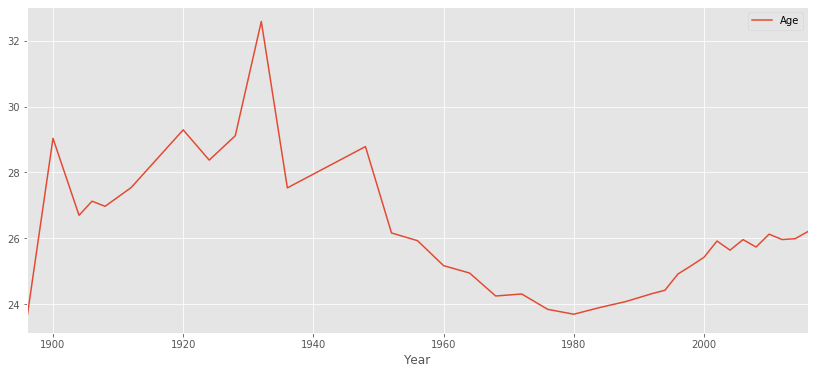

In [6]:
data[['Age', 'Year']].groupby(['Year']).mean().plot();

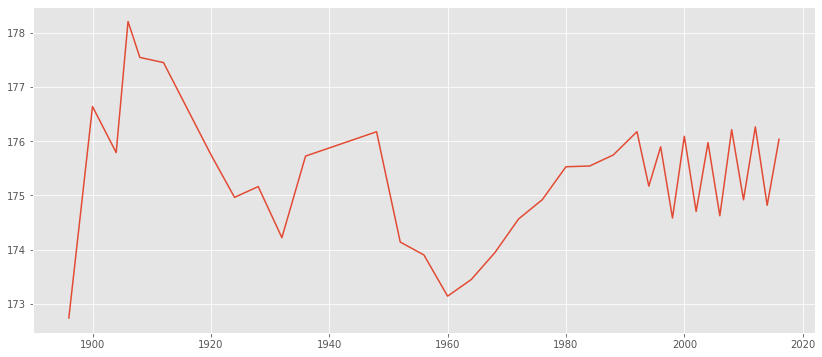

In [7]:
plt.plot(data.groupby('Year')['Height'].mean());

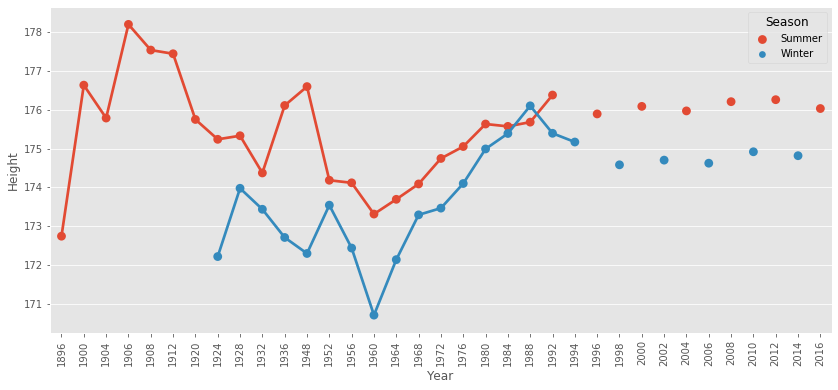

In [8]:
sns.pointplot(data.groupby(['Year', 'Season'])['Year'].first(), 
              data.groupby(['Year', 'Season'])['Height'].mean(),
              hue=data.groupby(['Year', 'Season'])['Season'].first());
plt.xticks(rotation=90);

In [ ]:
px.line(data.groupby(['Year', 'Season']).agg({'Height': 'mean'}).reset_index(), 
        x='Year', y='Height', line_group='Season', color='Season', title='Data by year')

## Гистограмма

гистограмма - график апроксимирующий плотность вероятности

гистограмма строится следующим образом

<img src="./img/hist.png">

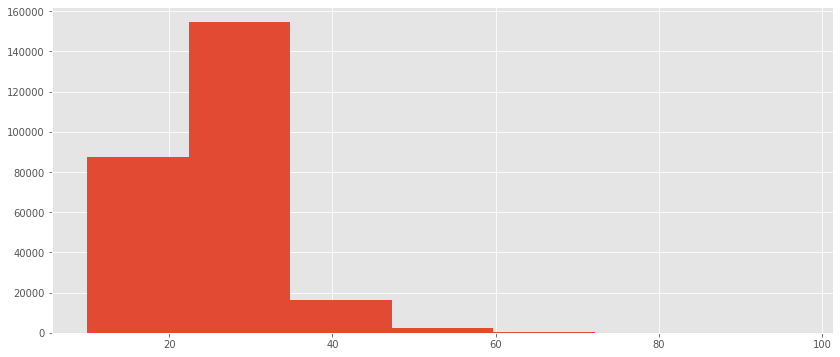

In [9]:
data['Age'].hist(bins=7);

c:\python36\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

c:\python36\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



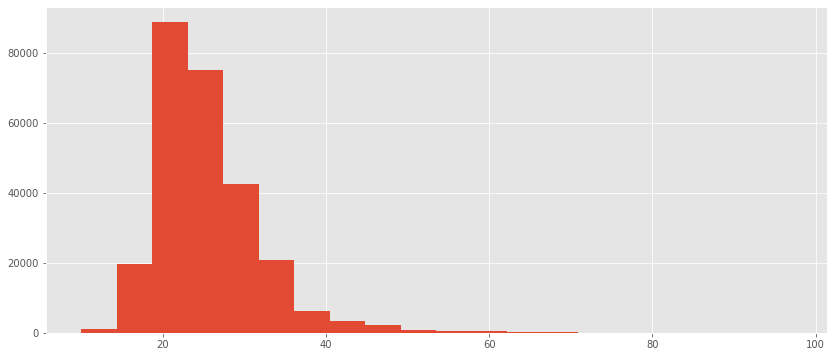

In [10]:
plt.hist(data['Age'], bins=20);

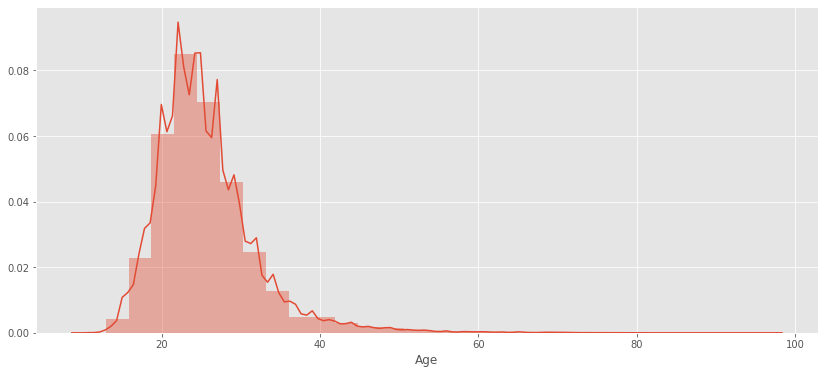

In [11]:
sns.distplot(data[~data['Age'].isnull()]['Age'], bins=30);

In [ ]:
px.histogram(data, x='Age', nbins=50, histnorm='probability')

Если хвост гистограммы смещен влево как на графике выше, стоит посмотреть гистограмму от логарифма признака, скорей всего он будет нормальным

In [ ]:
px.histogram(np.log1p(data[['Age']]), x='Age', nbins=25, histnorm='probability')

## Scatter

scatter - является простейшим способом отображения переменных на графике и представляет собой точку на графике, на пересечении двух значений

scatter полезен для исследования зависимости двух вещественных переменных, когда одному значению переменной может соответствовать любое количество значений другой переменной

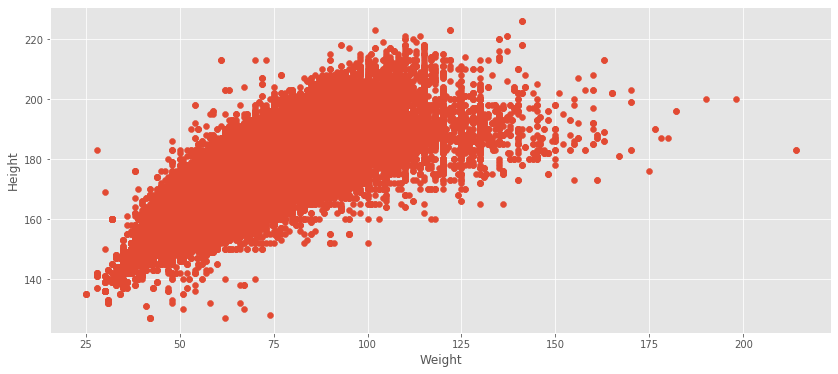

In [12]:
plt.scatter(data['Weight'], data['Height']);
plt.xlabel('Weight');
plt.ylabel('Height');

зависимость на графике выше похоже на зависимость от корня переменной, поэтому стоит возвести рост в квадрат и посмотреть на линейность

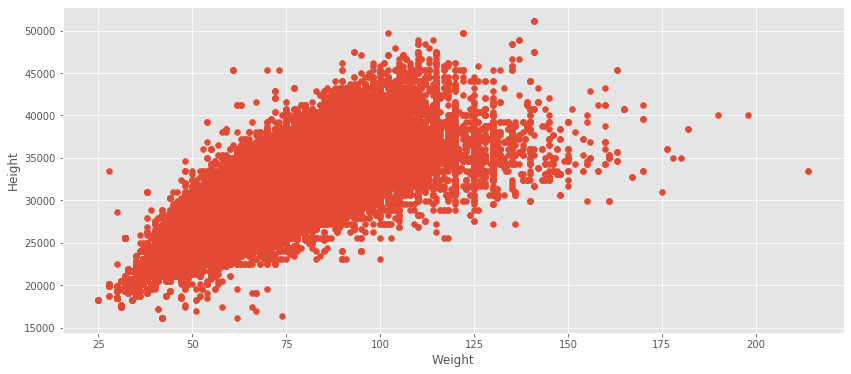

In [13]:
plt.scatter(data['Weight'], data['Height']**2);
plt.xlabel('Weight');
plt.ylabel('Height');

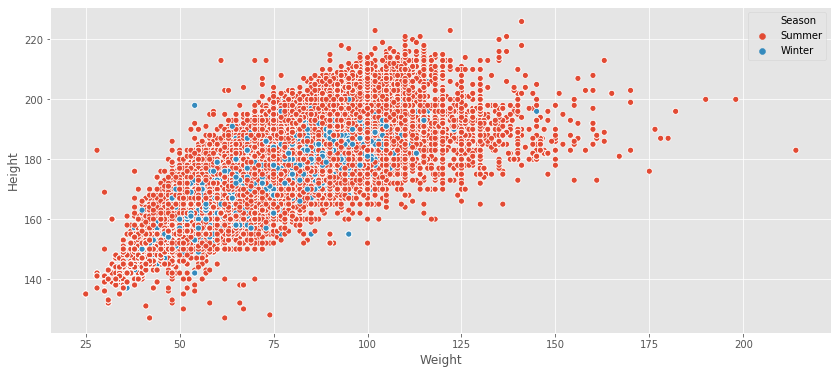

In [14]:
sns.scatterplot(data['Weight'], data['Height'], hue=data['Season']);

In [ ]:
px.scatter(data, x='Weight', y='Height', color='Season')

## Boxplot

boxplot - так же как и гистограмма представляет собой график плотности вероятности, но в отличии от гистограммы box имеет более компактный вид

за счет компактности boxplot мы можем строить зависимости между категориальной и вещественной переменной

<img src="./img/box.png">

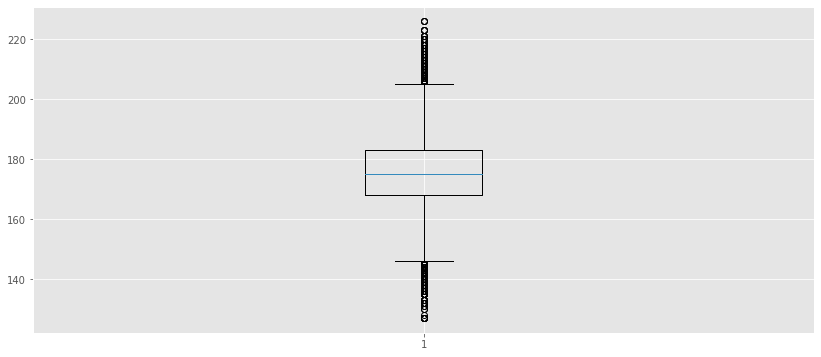

In [15]:
plt.boxplot(data[~data['Height'].isnull()]['Height']);

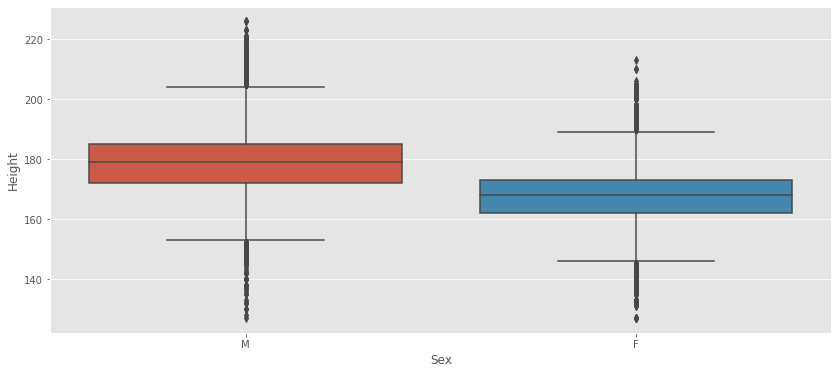

In [16]:
sns.boxplot(data[~data['Height'].isnull()]['Sex'], data[~data['Height'].isnull()]['Height']);

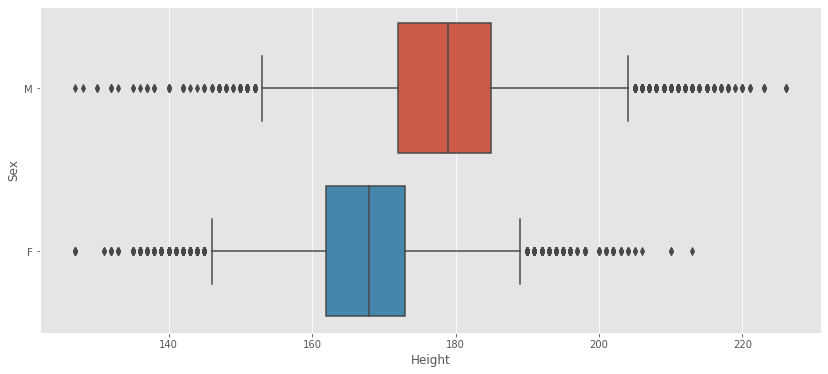

In [17]:
sns.boxplot(data[~data['Height'].isnull()]['Height'], data[~data['Height'].isnull()]['Sex'], orient='h');

In [ ]:
px.box(data, x='Height', y='Sex', orientation='h', color='Sex')

## Countplot или barplot

bar - это столбец установленного размера, обычно с помощью bar стоят количественные графики для категориальных переменных

countplot - является простым методом построения таких графиков

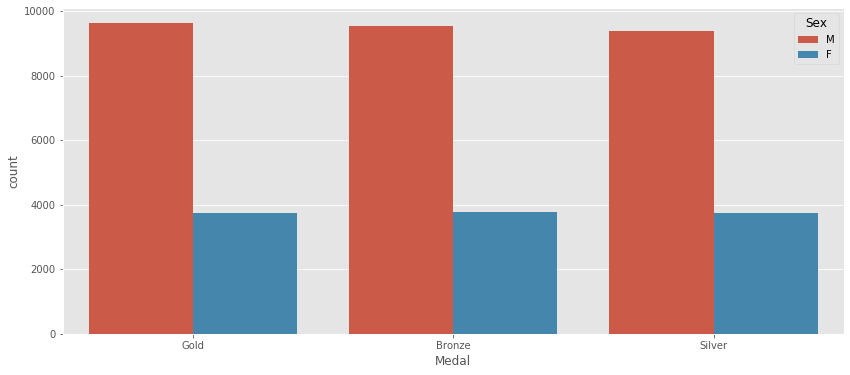

In [18]:
sns.countplot(data['Medal'], hue=data['Sex']);

In [ ]:
px.bar(data.groupby(['Sex', 'Medal']).agg(
    {'Sex': 'first', 'Medal': 'first', 'ID': 'count'}).reset_index(drop=True).rename(columns={'ID': 'count'}),
       x='Medal', y='count', color='Sex', barmode="group")

## Pairplot и scatter_matrix

функции предназначенные для построенния нескольких графиков зависимости между вещественными переменными

в обоих случаях для двух разных переменных строятся scatterplot, однако отличие pair_plot что между одинаковыми переменными строится гистограмма

c:\python36\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

c:\python36\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



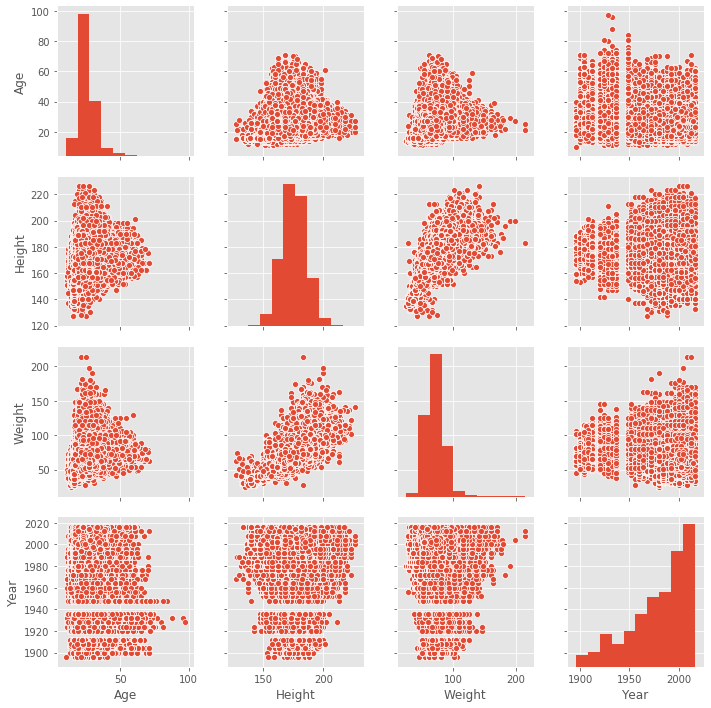

In [19]:
sns.pairplot(data[['Age', 'Height', 'Weight', 'Year']]);

In [ ]:
px.scatter_matrix(data[['Age', 'Height', 'Weight', 'Year']])

## Heatmap

heatmap - тепловая карта для иследования наиболее выраженных значений

In [20]:
corr = data[['Age', 'Height', 'Weight', 'Year']].corr()

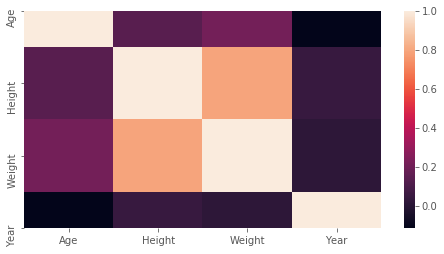

In [21]:
plt.figure(figsize=(8, 4));
sns.heatmap(corr);

In [ ]:
go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns))

## t-SNE

t-SNE это алгоритм уменьшения размерности, основанный на расстоянии между объектами, с его помощью можно визуализировать многомерные данные

In [22]:
from sklearn.manifold import t_sne
from sklearn.preprocessing import StandardScaler

In [23]:
tsne = t_sne.TSNE(n_components=2)

In [24]:
scaler = StandardScaler()

In [25]:
for col in ['Age', 'Year', 'Height', 'Weight']:
    data[col] = data[col].fillna(data[col].median())

In [26]:
scale_data = scaler.fit_transform(data[['Age', 'Year', 'Height', 'Weight']])

In [27]:
scale_data

array([[-0.23897086,  0.45591113,  0.51041951,  0.75213704],
       [-0.39802039,  1.12530946, -0.56726512, -0.8379206 ],
       [-0.23897086, -1.95392285, -0.0284228 , -0.04289178],
       ...,
       [ 0.23817772,  1.19224929,  0.07934566, -0.91742348],
       [ 0.7153263 ,  0.65673063,  1.04926183,  2.02418315],
       [ 1.35152441,  0.7906103 ,  1.04926183,  2.02418315]])

In [28]:
idx = np.random.choice(scale_data.shape[0], 10_000)

In [29]:
visualize_data = tsne.fit_transform(scale_data[idx])

In [30]:
visualize_data = pd.DataFrame({'x': visualize_data[:, 0], 'y': visualize_data[:, 1], 
                               'Medal': data.iloc[idx]['Medal'].fillna('None').values})

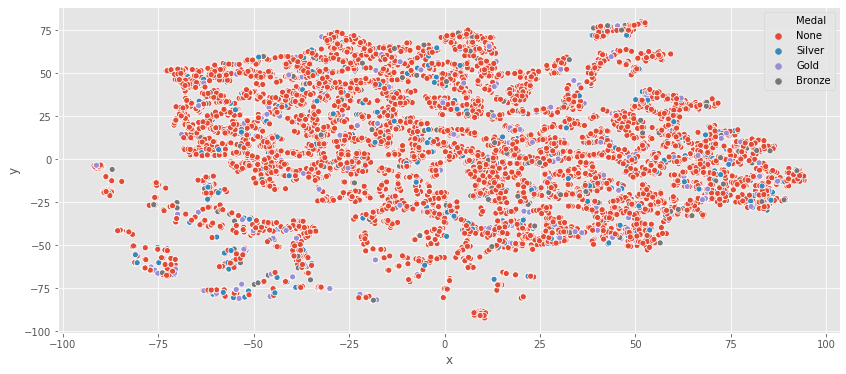

In [32]:
sns.scatterplot(visualize_data['x'], visualize_data['y'], hue=visualize_data['Medal']);

## Полезные материалы

tutorial matplotlib - https://matplotlib.org/tutorials/index.html

tutorial seaborn - https://seaborn.pydata.org/tutorial.html

tutorial plotly - https://plot.ly/python/

гистограмма - https://youtu.be/qBigTkBLU6g?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9

boxplot - https://youtu.be/fHLhBnmwUM0?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9

tSNE - https://youtu.be/NEaUSP4YerM